In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [148]:
df = pd.read_csv('train/train.csv').values

In [149]:
df.shape

(304, 2)

In [171]:
y=[]
for i in range(df.shape[0]):
    y.append(df[i][1])

In [168]:
test = pd.read_csv('test/test.csv')

In [238]:
x=[]
for i in range(df.shape[0]):
    img = cv2.imread('train/Images/'+df[i][0])
    img = cv2.resize(img,(100,100)).flatten()
    x.append(img)

In [239]:
x = np.array(x)
print(x.shape)

(304, 30000)


In [240]:
x[0]

array([232, 190, 145, ..., 211, 139,  79], dtype=uint8)

Text(0.5, 1.0, 'Pikachu')

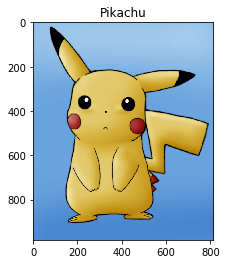

In [241]:
plt.imshow(rgb_img)
plt.title(df[0][1])

In [242]:
df.shape

(304, 2)

In [246]:
y = np.array(y)

In [247]:
y.shape

(304,)

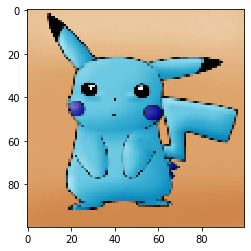

In [249]:
plt.imshow(x[0].reshape(100,100,3), cmap='gray')

In [250]:
def dist(a1,a2):
    return (np.sum(a1-a2)**2)**0.5

In [251]:
def KNN(X,Y,test_point,k=7):
    m = X.shape[0]
    vals = []
    for i in range(m):
        d = dist(test_point, X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    vals = np.array(vals[:5])
    
    b = np.unique(vals[:,1], return_counts=True)
    idx = np.argmax(b[1])
    pred = b[0][idx]
    
    return pred

In [252]:
pred = KNN(x,y,x[5])
print(pred)

Pikachu


In [253]:
y[5]

'Pikachu'

In [ ]:
count=0
for i in range(80,150):
    pred = KNN(x,y,x[i])
    print(str(i)+'. '+pred)
    print(str(i)+'. '+y[i])
    if(pred==y[i]):
        count=count+1

print(count)

In [262]:
test.shape

(123, 1)

In [264]:
test = test.values

In [279]:
test_arr = []
for i in range(test.shape[0]):
    img = cv2.imread('test/Images/'+test[i][0])
    img = cv2.resize(img,(100,100)).flatten()
    test_arr.append(img)

In [282]:
test_arr = np.array(test_arr)

In [283]:
test_arr.shape

(123, 30000)

In [285]:
for i in range(test_arr.shape[0]):
    pred = KNN(x,y,test_arr[i])
    print(pred)